Sample: 200
Number tiles: 1024


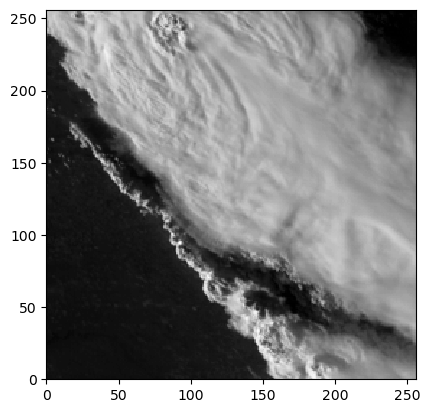

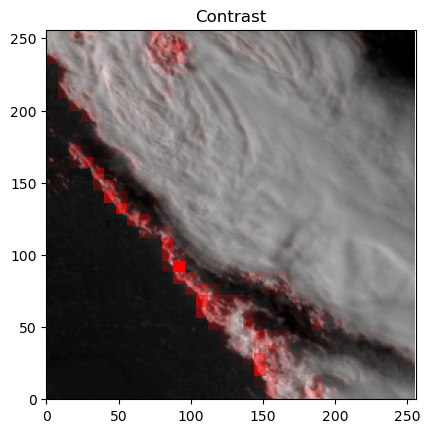

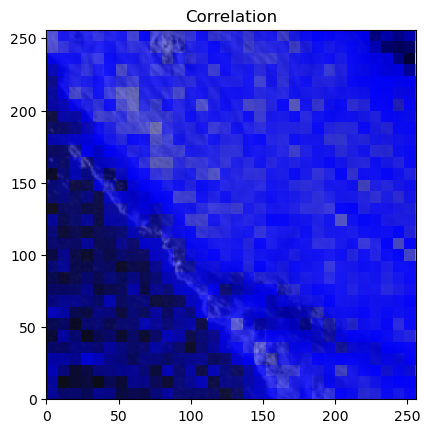

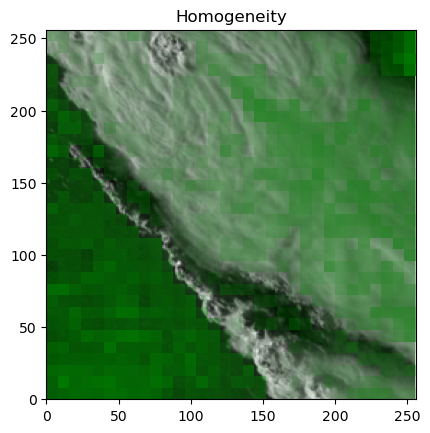

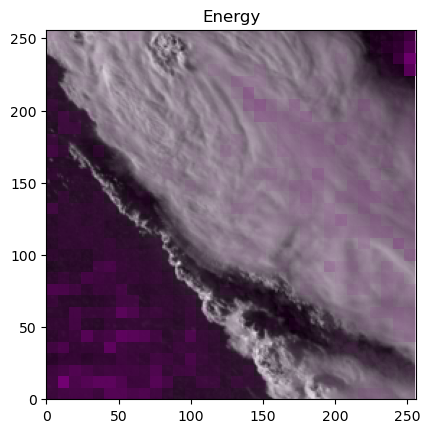

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import axes
from skimage.feature import graycomatrix, graycoprops
#from PIL import Image as PIL
#from skimage.util import view_as_blocks

# Input number of convection files, and sample number
num=204
isamp=200
print("Sample:", isamp)

# Define the size of the tiles
tile_size = 8

# Get sample image from Convection data
x_train_vis = np.zeros((num,256,256,9), dtype='float32')
f = open('/Users/kristinamoen/Library/CloudStorage/Dropbox/Math/Colorado State University/CIRA/Convection/20190523_seg_mrms_256_comp_real.bin','rb')
data = np.fromfile(f,dtype='float32')

for j in range(num):
    x_train_vis[j,:,:,:] = np.reshape(data[(j*(692224)):(j*(692224)+589824)],(256,256,9))

data = x_train_vis[isamp,:,:,0]
data *= 100
data=data.astype(np.uint8)
pcm = plt.pcolormesh(data, cmap='Greys_r')
plt.xlim(0,256)
plt.ylim(0,256)
plt.axis('scaled')

# Number rows and columns
num_rows = int(256/tile_size)
num_cols = int(256/tile_size)
num_tiles = int(num_rows * num_cols)
print("Number tiles:", num_tiles)

# Create empty lists to store the tiles, GLCMs, and Haralick features
tiles = []
glcms = []
contrast_value = []
contrast_values = []
correlation_values = []
energy_values = []
homogeneity_values = []

# Split the image into tiles and compute Haralick features
for r in range(0, 256, tile_size):
    for c in range(0, 256, tile_size):
        tile = data[r:r+tile_size, c:c+tile_size]
        tiles.append(tile)
        distances=[1]
        angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
        glcm0 = graycomatrix(tile, distances=distances, angles=[0], levels=256, symmetric=False)
        glcm1 = graycomatrix(tile, distances=distances, angles=[np.pi/4], levels=256, symmetric=False)
        glcm2 = graycomatrix(tile, distances=distances, angles=[np.pi/2], levels=256, symmetric=False)
        glcm3 = graycomatrix(tile, distances=distances, angles=[3 * np.pi/4], levels=256, symmetric=False)
        glcm=(glcm0 + glcm1 + glcm2 + glcm3)/4 #compute mean matrix
        glcms.append(glcm)
        contrast = (float(graycoprops(glcm, 'contrast')))
        correlation = float(graycoprops(glcm, 'correlation'))
        energy = float(graycoprops(glcm, 'energy'))
        homogeneity = float(graycoprops(glcm, 'homogeneity'))
        contrast_value.append(contrast)
        correlation_values.append(correlation)
        energy_values.append(energy)
        homogeneity_values.append(homogeneity)

# Make all contrast values scaled between 0 and 1
contrast_max=max(contrast_value)

for val in contrast_value:
    contrast_values.append(val/contrast_max)


#Print list of statistics
#print(feature, feature_values)
#print('Contrast:', contrast_values)
#print('Correlation:', correlation_values)
#print('Energy:', energy_values)
#print('Homogeneity:', homogeneity_values)

#Create an image with Haralick feature Contrast overlaid as patches

fig, ax = plt.subplots()
ax.imshow(data, cmap='gray')
plt.xlim(0,256)
plt.ylim(0,256)
plt.title("Contrast")

for r in range (0, 256, tile_size):
    for c in range (0, 256, tile_size):
        x_offset = c
        y_offset = r
        rect = plt.Rectangle((x_offset, y_offset), tile_size, tile_size, 
                             facecolor='red', edgecolor='none', alpha=contrast_values[(int(256/tile_size))*int(r/tile_size) + int(c/tile_size)])
        ax.add_patch(rect)
        
#Create an image with Haralick feature Correlation overlaid as patches

correlation_min=min(correlation_values)
correlation_max = max(correlation_values)

fig, ax = plt.subplots()
ax.imshow(data, cmap='gray')
plt.xlim(0,256)
plt.ylim(0,256)
plt.title("Correlation")
    
for r in range (0, 256, tile_size):
    for c in range (0, 256, tile_size):
        x_offset = c
        y_offset = r
        rect = plt.Rectangle((x_offset, y_offset), tile_size, tile_size, 
                             facecolor='blue', edgecolor='none', alpha=correlation_values[(int(256/tile_size))*int(r/tile_size) + int(c/tile_size)])
        ax.add_patch(rect)
        
#Create an image with Haralick feature homogeneity overlaid as patches
fig, ax = plt.subplots()
ax.imshow(data, cmap='gray')
plt.xlim(0,256)
plt.ylim(0,256)
plt.title("Homogeneity")

for r in range (0, 256, tile_size):
    for c in range (0, 256, tile_size):
        x_offset = c
        y_offset = r
        rect = plt.Rectangle((x_offset, y_offset), tile_size, tile_size, 
                             facecolor='green', edgecolor='none', alpha=homogeneity_values[(int(256/tile_size))*int(r/tile_size) + int(c/tile_size)])
        ax.add_patch(rect)
        
#Create an image with Haralick feature energy overlaid as patches
fig, ax = plt.subplots()
ax.imshow(data, cmap='gray')
plt.xlim(0,256)
plt.ylim(0,256)
plt.title("Energy")

for r in range (0, 256, tile_size):
    for c in range (0, 256, tile_size):
        x_offset = c
        y_offset = r
        rect = plt.Rectangle((x_offset, y_offset), tile_size, tile_size, 
                             facecolor='purple', edgecolor='none', alpha=energy_values[(int(256/tile_size))*int(r/tile_size) + int(c/tile_size)])
        ax.add_patch(rect)

Sample: 200
Number tiles: 1024


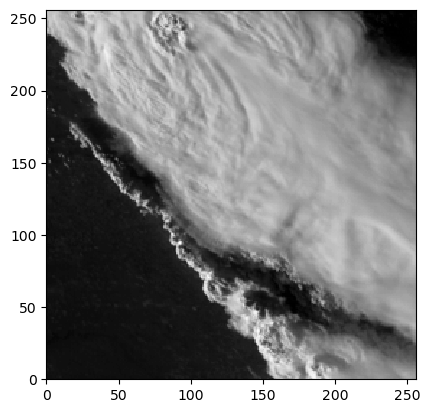

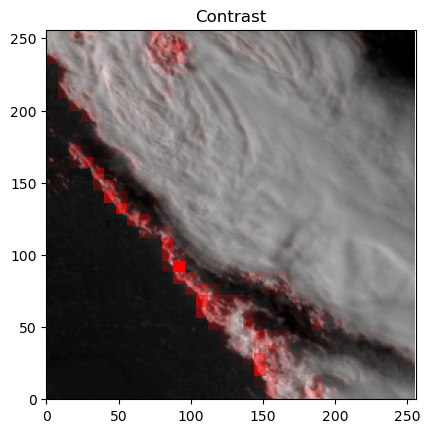

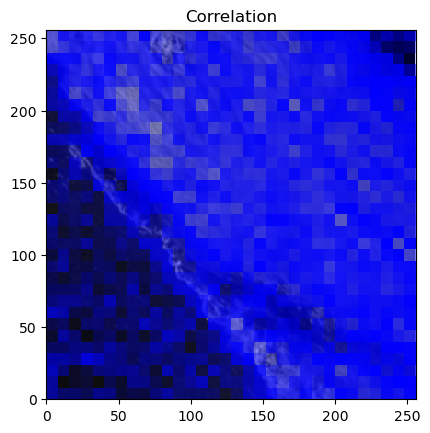

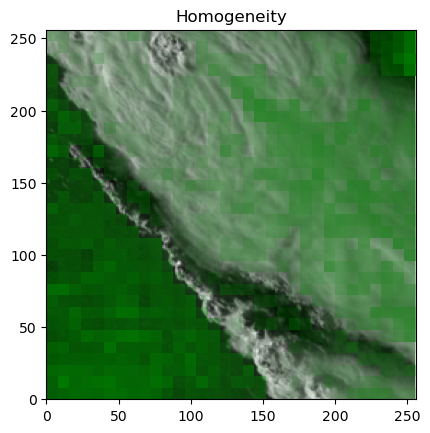

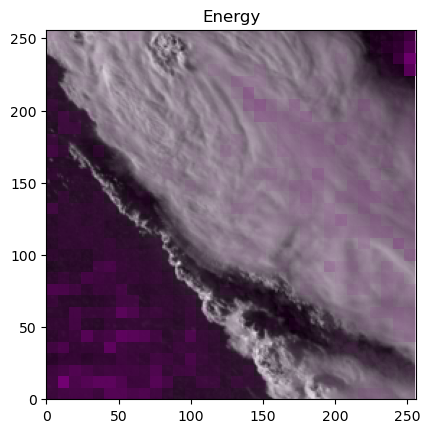

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import axes
from skimage.feature import graycomatrix, graycoprops
#from PIL import Image as PIL
#from skimage.util import view_as_blocks

# Input number of convection files, and sample number
num=204
isamp=200
print("Sample:", isamp)

# Define the size of the tiles
tile_size = 8

# Get sample image from Convection data
x_train_vis = np.zeros((num,256,256,9), dtype='float32')
f = open('/Users/kristinamoen/Library/CloudStorage/Dropbox/Math/Colorado State University/CIRA/Convection/20190523_seg_mrms_256_comp_real.bin','rb')
data = np.fromfile(f,dtype='float32')

for j in range(num):
    x_train_vis[j,:,:,:] = np.reshape(data[(j*(692224)):(j*(692224)+589824)],(256,256,9))

data = x_train_vis[isamp,:,:,0]
data *= 100
data=data.astype(np.uint8)
pcm = plt.pcolormesh(data, cmap='Greys_r')
plt.xlim(0,256)
plt.ylim(0,256)
plt.axis('scaled')

# Number rows and columns
num_rows = int(256/tile_size)
num_cols = int(256/tile_size)
num_tiles = int(num_rows * num_cols)
print("Number tiles:", num_tiles)

# Create empty lists to store the tiles, GLCMs, and Haralick features
tiles = []
glcms = []
contrast_value = []
contrast_values = []
correlation_values = []
energy_values = []
homogeneity_values = []

# Split the image into tiles and compute Haralick features
for r in range(0, 256, tile_size):
    for c in range(0, 256, tile_size):
        tile = data[r:r+tile_size, c:c+tile_size]
        tiles.append(tile)
        distances=[1]
        angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
        glcm0 = graycomatrix(tile, distances=distances, angles=[0], levels=256, symmetric=False)
        glcm1 = graycomatrix(tile, distances=distances, angles=[np.pi/4], levels=256, symmetric=False)
        glcm2 = graycomatrix(tile, distances=distances, angles=[np.pi/2], levels=256, symmetric=False)
        glcm3 = graycomatrix(tile, distances=distances, angles=[3 * np.pi/4], levels=256, symmetric=False)
        glcm=(glcm0 + glcm1 + glcm2 + glcm3)/4 #compute mean matrix
        glcms.append(glcm)
        contrast = (float(graycoprops(glcm, 'contrast')))
        correlation = float(graycoprops(glcm, 'correlation'))
        energy = float(graycoprops(glcm, 'energy'))
        homogeneity = float(graycoprops(glcm, 'homogeneity'))
        contrast_value.append(contrast)
        correlation_values.append(correlation)
        energy_values.append(energy)
        homogeneity_values.append(homogeneity)

# Make all contrast values scaled between 0 and 1
contrast_max=max(contrast_value)

for val in contrast_value:
    contrast_values.append(val/contrast_max)


#Print list of statistics
#print(feature, feature_values)
#print('Contrast:', contrast_values)
#print('Correlation:', correlation_values)
#print('Energy:', energy_values)
#print('Homogeneity:', homogeneity_values)

#Create an image with Haralick feature Contrast overlaid as patches

fig, ax = plt.subplots()
ax.imshow(data, cmap='gray')
plt.xlim(0,256)
plt.ylim(0,256)
plt.title("Contrast")

for r in range (0, 256, tile_size):
    for c in range (0, 256, tile_size):
        x_offset = c
        y_offset = r
        rect = plt.Rectangle((x_offset, y_offset), tile_size, tile_size, 
                             facecolor='red', edgecolor='none', alpha=contrast_values[(int(256/tile_size))*int(r/tile_size) + int(c/tile_size)])
        ax.add_patch(rect)
        
#Create an image with Haralick feature Correlation overlaid as patches

correlation_min=min(correlation_values)
correlation_max= max(correlation_values)
#print(correlation_values)

fig, ax = plt.subplots()
ax.imshow(data, cmap='gray')
plt.xlim(0,256)
plt.ylim(0,256)
plt.title("Correlation")
    
for r in range (0, 256, tile_size):
    for c in range (0, 256, tile_size):
        x_offset = c
        y_offset = r
        rect = plt.Rectangle((x_offset, y_offset), tile_size, tile_size, 
                             facecolor='blue', edgecolor='none', alpha=(correlation_values[(int(256/tile_size))*int(r/tile_size) + int(c/tile_size)] - correlation_min)/(correlation_max - correlation_min))
        ax.add_patch(rect)
        
#Create an image with Haralick feature homogeneity overlaid as patches
fig, ax = plt.subplots()
ax.imshow(data, cmap='gray')
plt.xlim(0,256)
plt.ylim(0,256)
plt.title("Homogeneity")

for r in range (0, 256, tile_size):
    for c in range (0, 256, tile_size):
        x_offset = c
        y_offset = r
        rect = plt.Rectangle((x_offset, y_offset), tile_size, tile_size, 
                             facecolor='green', edgecolor='none', alpha=homogeneity_values[(int(256/tile_size))*int(r/tile_size) + int(c/tile_size)])
        ax.add_patch(rect)
        
#Create an image with Haralick feature energy overlaid as patches
fig, ax = plt.subplots()
ax.imshow(data, cmap='gray')
plt.xlim(0,256)
plt.ylim(0,256)
plt.title("Energy")

for r in range (0, 256, tile_size):
    for c in range (0, 256, tile_size):
        x_offset = c
        y_offset = r
        rect = plt.Rectangle((x_offset, y_offset), tile_size, tile_size, 
                             facecolor='purple', edgecolor='none', alpha=energy_values[(int(256/tile_size))*int(r/tile_size) + int(c/tile_size)])
        ax.add_patch(rect)